In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


In [2]:
unemployment = pd.read_csv('USunemployment.csv')
automation = pd.read_csv('raw_state_automation_data.csv', encoding='cp1252')
economyData = pd.read_csv('economy-and-growth-indicators-for-united-states-1.csv')
economyState = pd.read_csv('SAEMP25N__ALL_AREAS_1998_2018.csv')
income = pd.read_csv('PARPI_PORT_2008_2017.csv')

unemployment = unemployment.transpose()
unemployment.columns = unemployment.iloc[0]
unemployment = unemployment[1:]
unemployment1319 = unemployment[[2013, 2014, 2015, 2016, 2017, 2018, 2019]]
unemployment1318 = unemployment[[2013, 2014, 2015, 2016, 2017, 2018]]

unemployment1319
#print(automation)

Year,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Jan,8.0,6.6,5.7,4.9,4.7,4.1,4.0
Feb,7.7,6.7,5.5,4.9,4.6,4.1,3.8
Mar,7.5,6.7,5.4,5.0,4.4,4.0,3.8
Apr,7.6,6.2,5.4,5.0,4.4,4.0,3.6
May,7.5,6.3,5.6,4.8,4.4,3.8,3.6
Jun,7.5,6.1,5.3,4.9,4.3,4.0,3.7
Jul,7.3,6.2,5.2,4.8,4.3,3.8,3.7
Aug,7.2,6.1,5.1,4.9,4.4,3.8,3.7
Sep,7.2,5.9,5.0,5.0,4.2,3.7,3.5
Oct,7.2,5.7,5.0,4.9,4.1,3.8,3.6


In [3]:
#economyData
economyState

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"""00000""",United States,,SAEMP25N,10.0,...,Total employment (number of jobs),Number of jobs,158481200,161531300,...,173636700,172901700,176091700,178979700,182325100,186233800,190315800,193371900,196825300,200746000
1,"""00000""",United States,,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,131920000,134766000,...,136242000,135393000,136918000,139619000,141932000,144722000,147636000,149912000,151860000,154375000
2,"""00000""",United States,,SAEMP25N,40.0,...,Proprietors employment,Number of jobs,26561200,26765300,...,37394700,37508700,39173700,39360700,40393100,41511800,42679800,43459900,44965300,46371000
3,"""00000""",United States,,SAEMP25N,50.0,...,Farm proprietors employment,Number of jobs,2249000,2237000,...,1884000,1882000,1876000,1844000,1856000,1840000,1829000,1818000,1802000,1790000
4,"""00000""",United States,,SAEMP25N,60.0,...,Nonfarm proprietors employment 2/,Number of jobs,24312200,24528300,...,35510700,35626700,37297700,37516700,38537100,39671800,40850800,41641900,43163300,44581000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079,"""98000""",Far West,8,SAEMP25N,2012.0,...,Local government,Number of jobs,2049355,2128346,...,2418060,2352019,2302469,2281894,2293991,2333449,2389478,2465535,2504730,2530582
7080,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7081,SAEMP25N: Total Full-Time and Part-Time Employ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7082,"Last updated: September 24, 2019-- new statist...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
economyData.head(147)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,United States,USA,2018,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.80342635197447
2,United States,USA,2017,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.89152608425851
3,United States,USA,2016,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.78920842643673
4,United States,USA,2015,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.84591705168341
...,...,...,...,...,...,...
142,United States,USA,1975,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,12580000000
143,United States,USA,1974,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,12110000000
144,United States,USA,1973,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,8950000000
145,United States,USA,1972,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,5850000000


In [5]:
incomeLevels13to18 = economyData[((economyData['Year'] == '2013') | (economyData['Year'] == '2014') | (economyData['Year'] == '2015') | (economyData['Year'] == '2016') | (economyData['Year'] == '2017') | (economyData['Year'] == '2018')) & (economyData['Indicator Code'] == 'BM.GSR.FCTY.CD')]
#incomeLevels2014 = economyData[(economyData['Year'] == '2014') & (economyData['Indicator Code'] == 'BM.GSR.FCTY.CD')]
#incomeLevels2015 = economyData[(economyData['Year'] == '2015') & (economyData['Indicator Code'] == 'BM.GSR.FCTY.CD')]
#incomeLevels2016 = economyData[(economyData['Year'] == '2016') & (economyData['Indicator Code'] == 'BM.GSR.FCTY.CD')]
#incomeLevels2017 = economyData[(economyData['Year'] == '2017') & (economyData['Indicator Code'] == 'BM.GSR.FCTY.CD')]
#incomeLevels2018 = economyData[(economyData['Year'] == '2018') & (economyData['Indicator Code'] == 'BM.GSR.FCTY.CD')]
#incomeValues1318 = 
incomeLevels13to18 = incomeLevels13to18.sort_values(by='Year', ascending = True)
incomeLevels13to18

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
104,United States,USA,2013,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,586843000000
103,United States,USA,2014,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,606150000000
102,United States,USA,2015,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,606465000000
101,United States,USA,2016,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,636857000000
100,United States,USA,2017,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,707506000000
99,United States,USA,2018,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,830203000000


In [6]:
#unemployment levels from 2013 to 2019
unemployment13to19MEAN = unemployment1319.mean()
unemployment13to18MEAN = unemployment1318.mean()
#unemployment13to19MEAN
unemployment13to18MEAN


Year
2013.0    7.358333
2014.0    6.158333
2015.0    5.275000
2016.0    4.875000
2017.0    4.341667
2018.0    3.891667
dtype: float64

In [7]:
automation

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,53-7072,Pump Operators; Except Wellhead Pumpers,0.900,0,0,0,0,1130,190,0,...,0,130,3780,0,0,0,0,110,80,0
698,53-7073,Wellhead Pumpers,0.840,0,0,0,180,220,600,0,...,0,0,4130,90,0,0,0,550,0,550
699,53-7081,Refuse and Recyclable Material Collectors,0.930,2070,210,1980,1530,13850,1710,910,...,430,2230,7760,710,480,3430,1890,970,2140,230
700,53-7111,Mine Shuttle Car Operators,0.370,50,0,0,0,0,70,0,...,0,0,0,0,0,0,0,510,0,0


In [8]:
#automation probability across industries/jobs
automationProbability = automation[['Probability']]
#type(automationProbability)
automationProbability

,Probability
0,0.015
1,0.160
2,0.039
3,0.014
4,0.013
...,...
697,0.900
698,0.840
699,0.930
700,0.370


In [9]:
#sns.scatterplot(automation.Probability, unemployment13to19)
#unemployment13to19MEAN
#automation

In [10]:
#autoUnemployment = automation[['Probability']]
#mergeData = pd.merge(autoUnemployment, unemployment13to19MEAN)

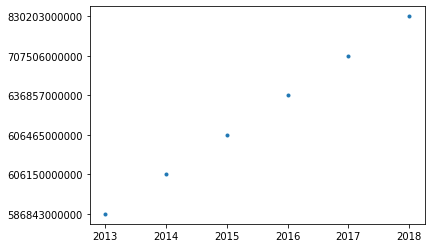

In [11]:
#sns.scatterplot(incomeLevels13to18['Year'], incomeLevels13to18['Value'])
#incomeLevels13to18.plot(incomeLevels13to18, kind='scatter')
#sns.ylim(5000000000000,9000000000000 )
incomeLevels13to18
income13to18 = incomeLevels13to18[['Year','Value']]
income13to18UN = income13to18.reset_index()
income13to18 = income13to18UN[['Year','Value']]
income13to18
#sns.scatterplot(data = income13to18)
#income13to18.plot(income13to18['Year'], income13to18['Value'], kind='scatter')
#sns.scatterplot(income13to18['Year'], income13to18['Value'])
plt.plot([2013, 2014, 2015, 2016, 2017, 2018], income13to18['Value'], '.')
f1 = plt.gcf()

In [12]:
income13to18

,Year,Value
0,2013,586843000000
1,2014,606150000000
2,2015,606465000000
3,2016,636857000000
4,2017,707506000000
5,2018,830203000000


In [13]:
#outcome_1, predictors_1 = patsy.dmatrices('Year ~ Value', income13to18)
#mod_1 = sm.OLS(outcome_1, predictors_1)
#res_1 = mod_1.fit()
#print(res_1.summary())

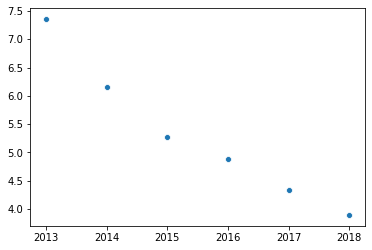

In [14]:
#years = 
sns.scatterplot([2013, 2014, 2015, 2016, 2017, 2018], unemployment13to18MEAN)

In [15]:
#economyData.head(5)

In [21]:
incomeState = economyState[economyState.LineCode == 20]
incomeState = incomeState.reset_index()
incomeState = incomeState.drop('index',1)
incomeState
incomeState = incomeState.loc[(incomeState.index < 52) & (incomeState.index > 0)]
incomeState

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,"""01000""",Alabama,5,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,1994381,2007120,...,1968098,1949629,1949307,1963937,1979360,1996239,2024947,2049973,2072890,2097496
2,"""02000""",Alaska,8,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,298940,299907,...,350471,352399,358363,364972,365773,365894,367734,361189,356975,356279
3,"""04000""",Arizona,6,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,2178443,2254939,...,2515005,2473095,2499245,2558410,2617500,2669276,2745483,2817087,2883231,2961477
4,"""05000""",Arkansas,5,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,1175697,1194966,...,1221329,1219912,1223928,1229574,1231398,1243509,1264879,1279721,1285993,1296353
5,"""06000""",California,8,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,14746957,15179482,...,15151262,14946231,15091751,15713601,16212158,16694268,17186042,17602390,17900450,18306558
6,"""08000""",Colorado,7,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,2172785,2247839,...,2367380,2346646,2383753,2437001,2507504,2593514,2670174,2726499,2786042,2849998
7,"""09000""",Connecticut,1,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,1709380,1732908,...,1692091,1671424,1685883,1704885,1717324,1730465,1740192,1743844,1745013,1750652
8,"""10000""",Delaware,2,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,417879,429712,...,428633,426000,429319,433059,441311,450718,459147,464103,466924,472353
9,"""11000""",District of Columbia,2,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,652232,664926,...,719705,731389,742832,749247,758641,767306,775927,788290,793692,801884
10,"""12000""",Florida,5,SAEMP25N,20.0,...,Wage and salary employment,Number of jobs,6976587,7227372,...,7598169,7519804,7601048,7760916,7935168,8191643,8472201,8735579,8922320,9142913


In [17]:
income = income[['GeoName', 'LineCode','2008', '2009', '2010', '2011', '2012', '2013', '2014' , '2015', '2016', '2017']]
income = income[income.LineCode == 1.0]
income = income.loc[income.index > 0]
income.head(20)
#income = income.drop['']
#income.drop(income.index[[17,18]])
#income.drop(income.index[17])
#income.drop(income.index[18])
#if(income[income.GeoName] == 'Alaska (Nonmetropolitan Portion)'):
    #print('JERE')
#if (income.GeoName )
#income
#income = income[income.]
#N = 2
#income.groupby(income.index // N).sum()

,GeoName,LineCode,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Alabama (Metropolitan Portion),1.0,147164.4,144855.4,148511.9,152086.5,153301.9,152854.3,157153.5,163803.7,166233.4,169226.8
2,Alabama (Nonmetropolitan Portion),1.0,44876.3,45032.0,44478.3,44197.6,44073.8,44325.4,45440.7,47045.8,46894.1,47406.4
3,Alaska (Metropolitan Portion),1.0,22530.4,22413.0,23760.8,24715.6,24852.7,24314.3,25013.7,26175.3,25389.7,25351.4
4,Alaska (Nonmetropolitan Portion),1.0,10132.5,10344.8,11198.6,11975.1,12436.9,12364.7,12700.0,12996.4,12751.4,12857.8
5,Arizona (Metropolitan Portion),1.0,226068.6,215106.8,218383.9,225354.0,233130.4,237742.5,249410.4,262476.1,271074.1,281656.8
6,Arizona (Nonmetropolitan Portion),1.0,10615.4,10993.2,10956.9,11297.0,11154.6,11030.3,11882.8,12029.1,12321.3,12820.8
7,Arkansas (Metropolitan Portion),1.0,72353.2,71518.5,72364.2,76166.9,81772.1,80285.1,85893.3,88925.6,91869.6,94086.7
8,Arkansas (Nonmetropolitan Portion),1.0,40217.0,39592.7,39262.4,40027.4,40530.0,40626.3,41603.4,41611.2,41400.4,42677.5
9,California (Metropolitan Portion),1.0,1482071.7,1436266.4,1468071.2,1532028.1,1609350.7,1614253.6,1696093.9,1819063.3,1866081.5,1916207.2
10,California (Nonmetropolitan Portion),1.0,30136.7,30760.5,31790.1,32600.3,32812.0,33004.1,34425.1,36274.0,37859.7,38003.4


In [18]:
income = income.drop(income.index[17])
income = income.drop(income.index[18])
income

,GeoName,LineCode,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Alabama (Metropolitan Portion),1.0,147164.4,144855.4,148511.9,152086.5,153301.9,152854.3,157153.5,163803.7,166233.4,169226.8
2,Alabama (Nonmetropolitan Portion),1.0,44876.3,45032.0,44478.3,44197.6,44073.8,44325.4,45440.7,47045.8,46894.1,47406.4
3,Alaska (Metropolitan Portion),1.0,22530.4,22413.0,23760.8,24715.6,24852.7,24314.3,25013.7,26175.3,25389.7,25351.4
4,Alaska (Nonmetropolitan Portion),1.0,10132.5,10344.8,11198.6,11975.1,12436.9,12364.7,12700.0,12996.4,12751.4,12857.8
5,Arizona (Metropolitan Portion),1.0,226068.6,215106.8,218383.9,225354.0,233130.4,237742.5,249410.4,262476.1,271074.1,281656.8
...,...,...,...,...,...,...,...,...,...,...,...,...
98,West Virginia (Nonmetropolitan Portion),1.0,24026.7,24120.1,24308.3,25271.0,25255.2,24567.7,24982.7,25005.6,24870.3,25096.4
99,Wisconsin (Metropolitan Portion),1.0,190381.7,187029.5,188532.7,194647.4,199766.6,199465.1,204999.6,214467.2,218775.2,223922.1
100,Wisconsin (Nonmetropolitan Portion),1.0,61473.5,61144.9,62502.2,63196.6,64407.9,63707.0,65322.0,67531.4,67787.7,69515.9
101,Wyoming (Metropolitan Portion),1.0,8862.7,8011.3,8394.7,8787.2,9617.6,9784.4,10432.2,10875.3,9873.2,9778.5


pandas.core.frame.DataFrame

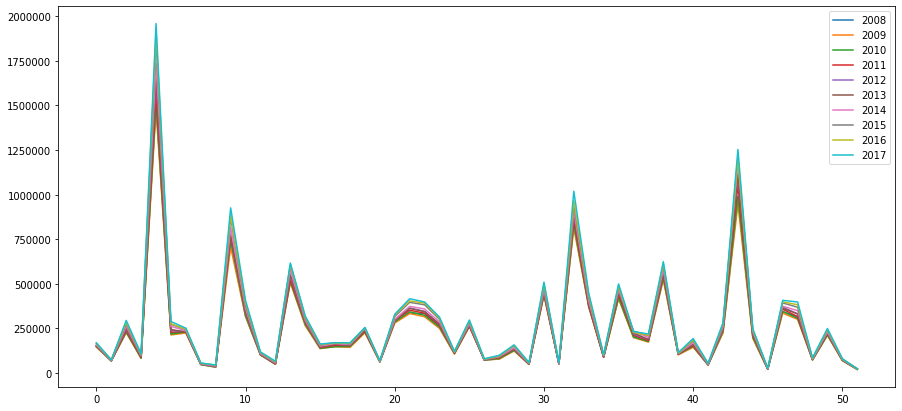

In [42]:
N = 2
fig, ax = plt.subplots(figsize=(15,7))
totalIn = income.groupby(income.index // N).sum()
income.groupby(income.index // N).sum()[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].plot(ax=ax)
#income.groupby(income.index // N).sum()[['2017']].plot(kind='scatter', ax=ax)

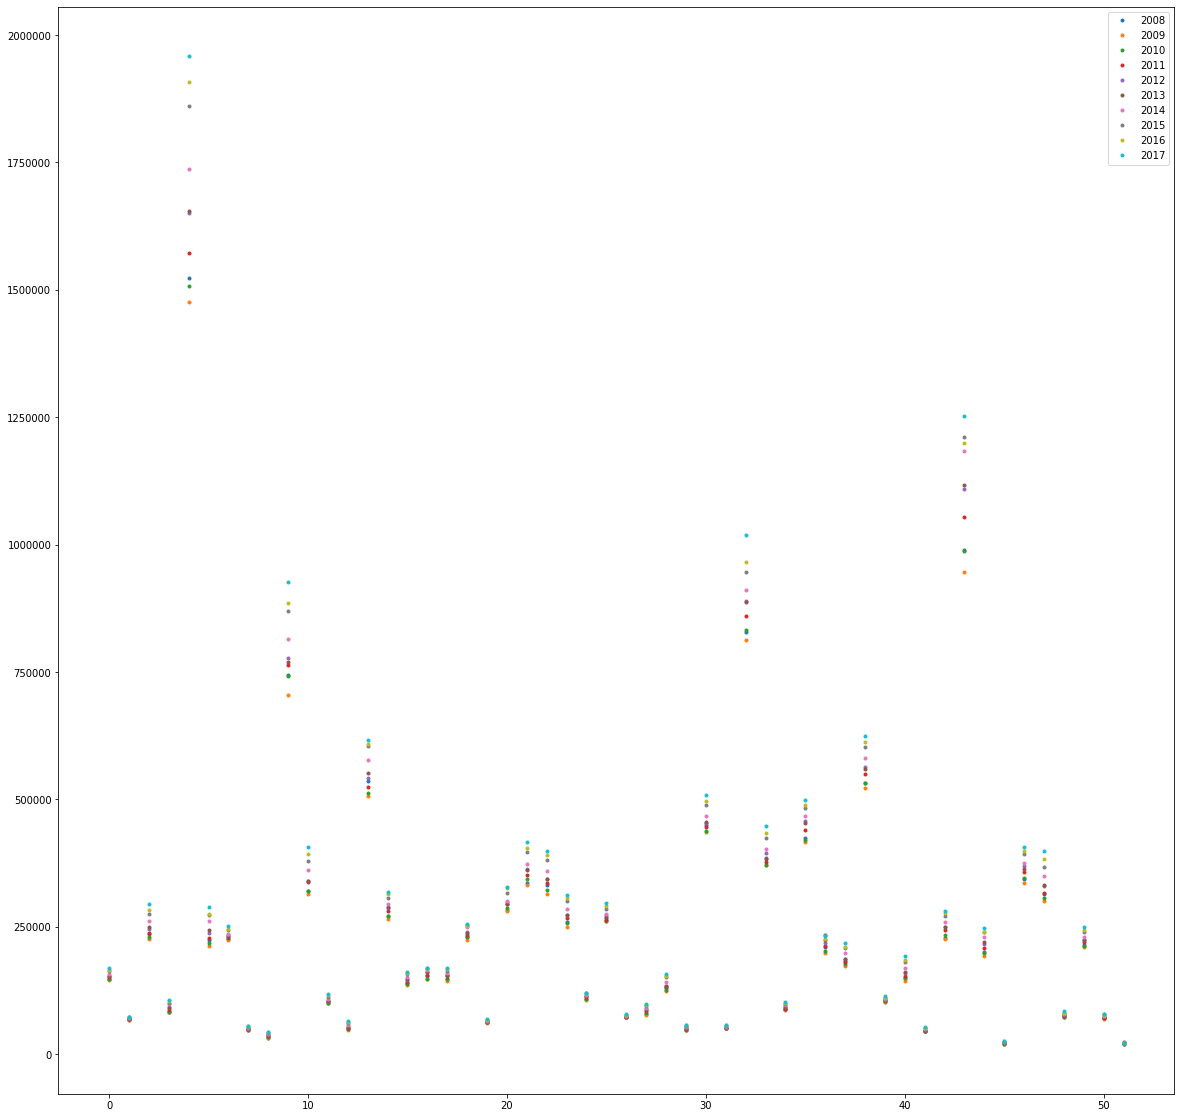

In [65]:
totalIn
d = {'2008' : totalIn['2008'],
     '2009': totalIn['2009'],
    '2010' : totalIn['2010'],
     '2011': totalIn['2011'],
    '2012' : totalIn['2012'],
     '2013': totalIn['2013'],
    '2014' : totalIn['2014'],
     '2015': totalIn['2015'],
    '2016' : totalIn['2016'],
     '2017': totalIn['2017']}

df = pd.DataFrame(d)

df.plot(style=['.', '.', '.', '.', '.','.','.','.','.','.','.'], figsize = (20,20))

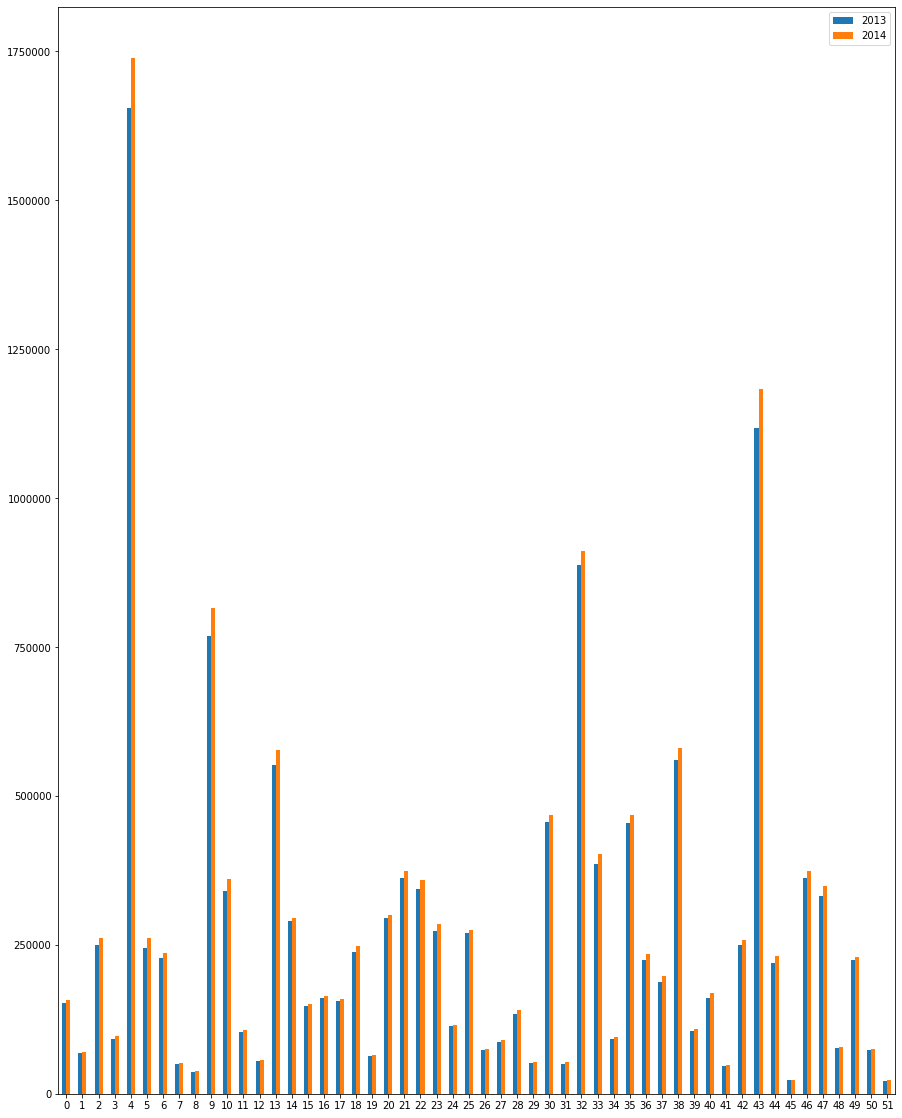

In [76]:
totalIn
d = {'2013': totalIn['2013'],
    '2014' : totalIn['2014']}

df = pd.DataFrame(d)

df.plot.bar(rot=0, figsize = (15,20))

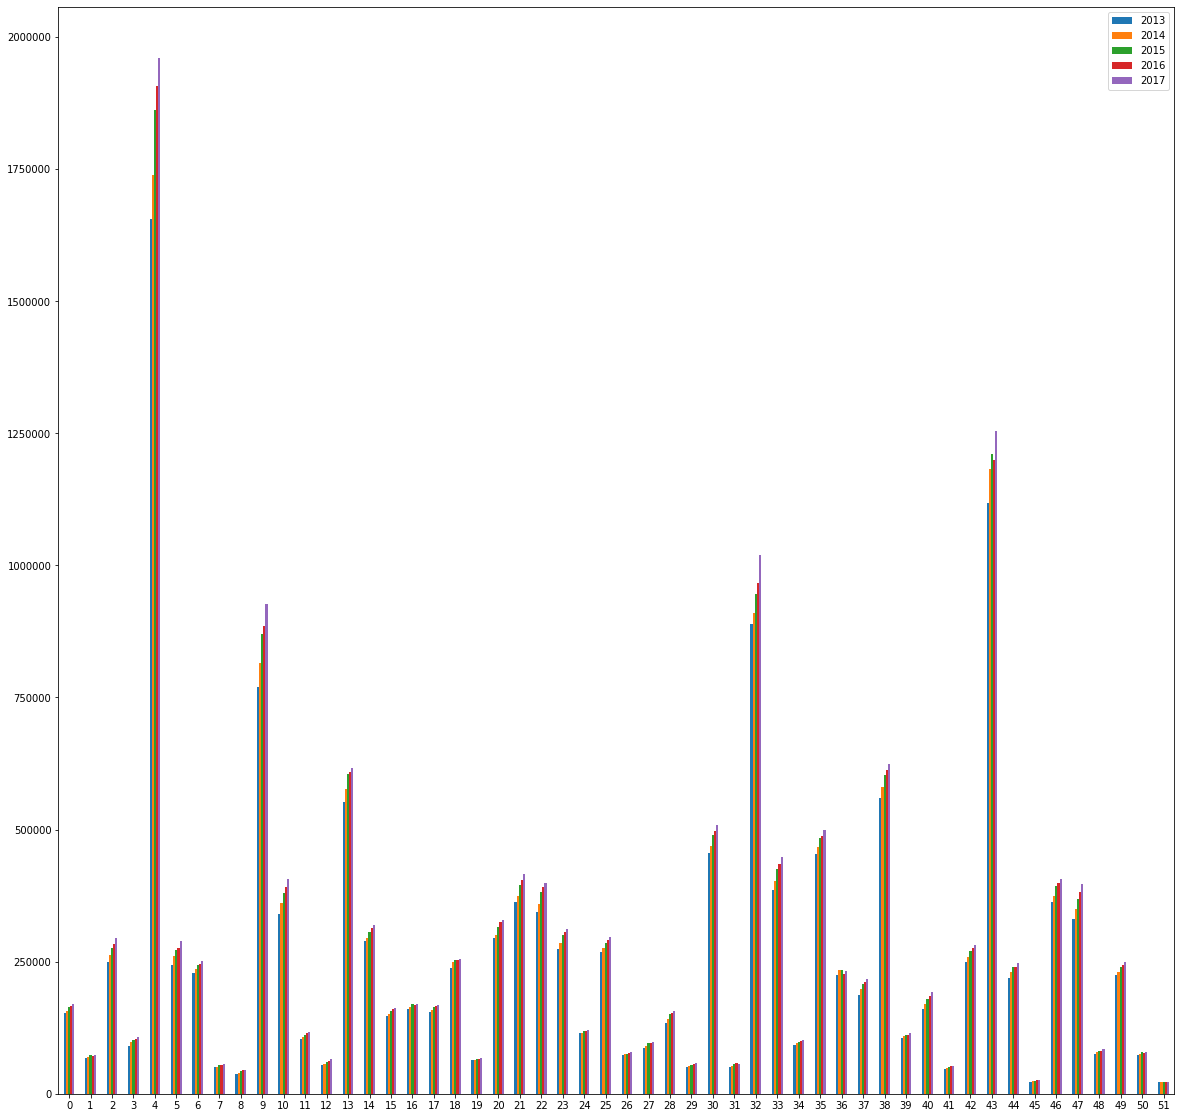

In [72]:
totalIn
d = {'2013': totalIn['2013'],
    '2014' : totalIn['2014'],
     '2015': totalIn['2015'],
    '2016' : totalIn['2016'],
     '2017': totalIn['2017']}

df = pd.DataFrame(d)

df.plot.bar(rot=0, figsize = (20,20))

In [106]:
totalIn

,LineCode,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.0,147164.4,144855.4,148511.9,152086.5,153301.9,152854.3,157153.5,163803.7,166233.4,169226.8
1,2.0,67406.7,67445.0,68239.1,68913.2,68926.5,68639.7,70454.4,73221.1,72283.8,72757.8
2,2.0,236201.1,225451.6,229582.5,237329.1,245567.3,250107.2,262110.4,275472.5,283825.5,294514.6
3,2.0,82968.6,82511.7,83321.1,87463.9,92926.7,91315.4,97776.1,100954.7,104190.9,106907.5
4,2.0,1522288.7,1475859.1,1507333.6,1572055.5,1649880.7,1654879.9,1737697.3,1860674.5,1907481.9,1958884.7
5,2.0,223516.7,213206.3,217612.8,228786.1,238142.1,243994.7,261163.1,272544.1,275804.9,288300.7
6,2.0,226760.7,223861.9,229856.9,232671.6,233080.6,228287.4,236560.0,243249.2,245426.4,251141.7
7,2.0,47501.7,46961.3,47036.7,49879.6,50085.0,50179.6,51169.9,54047.5,54570.8,55819.3
8,2.0,32566.9,32688.9,34012.4,36157.8,36891.7,37253.7,38851.5,42319.1,44334.6,44440.2
9,1.0,744593.3,705280.2,743126.3,763503.3,777957.8,768802.3,814468.6,869421.5,884671.3,925708.3


In [105]:
income.head(60)

,GeoName,LineCode,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Alabama (Metropolitan Portion),1.0,147164.4,144855.4,148511.9,152086.5,153301.9,152854.3,157153.5,163803.7,166233.4,169226.8
2,Alabama (Nonmetropolitan Portion),1.0,44876.3,45032.0,44478.3,44197.6,44073.8,44325.4,45440.7,47045.8,46894.1,47406.4
3,Alaska (Metropolitan Portion),1.0,22530.4,22413.0,23760.8,24715.6,24852.7,24314.3,25013.7,26175.3,25389.7,25351.4
4,Alaska (Nonmetropolitan Portion),1.0,10132.5,10344.8,11198.6,11975.1,12436.9,12364.7,12700.0,12996.4,12751.4,12857.8
5,Arizona (Metropolitan Portion),1.0,226068.6,215106.8,218383.9,225354.0,233130.4,237742.5,249410.4,262476.1,271074.1,281656.8
6,Arizona (Nonmetropolitan Portion),1.0,10615.4,10993.2,10956.9,11297.0,11154.6,11030.3,11882.8,12029.1,12321.3,12820.8
7,Arkansas (Metropolitan Portion),1.0,72353.2,71518.5,72364.2,76166.9,81772.1,80285.1,85893.3,88925.6,91869.6,94086.7
8,Arkansas (Nonmetropolitan Portion),1.0,40217.0,39592.7,39262.4,40027.4,40530.0,40626.3,41603.4,41611.2,41400.4,42677.5
9,California (Metropolitan Portion),1.0,1482071.7,1436266.4,1468071.2,1532028.1,1609350.7,1614253.6,1696093.9,1819063.3,1866081.5,1916207.2
10,California (Nonmetropolitan Portion),1.0,30136.7,30760.5,31790.1,32600.3,32812.0,33004.1,34425.1,36274.0,37859.7,38003.4


In [101]:
automation

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,53-7072,Pump Operators; Except Wellhead Pumpers,0.900,0,0,0,0,1130,190,0,...,0,130,3780,0,0,0,0,110,80,0
698,53-7073,Wellhead Pumpers,0.840,0,0,0,180,220,600,0,...,0,0,4130,90,0,0,0,550,0,550
699,53-7081,Refuse and Recyclable Material Collectors,0.930,2070,210,1980,1530,13850,1710,910,...,430,2230,7760,710,480,3430,1890,970,2140,230
700,53-7111,Mine Shuttle Car Operators,0.370,50,0,0,0,0,70,0,...,0,0,0,0,0,0,0,510,0,0


In [78]:
automation

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,53-7072,Pump Operators; Except Wellhead Pumpers,0.900,0,0,0,0,1130,190,0,...,0,130,3780,0,0,0,0,110,80,0
698,53-7073,Wellhead Pumpers,0.840,0,0,0,180,220,600,0,...,0,0,4130,90,0,0,0,550,0,550
699,53-7081,Refuse and Recyclable Material Collectors,0.930,2070,210,1980,1530,13850,1710,910,...,430,2230,7760,710,480,3430,1890,970,2140,230
700,53-7111,Mine Shuttle Car Operators,0.370,50,0,0,0,0,70,0,...,0,0,0,0,0,0,0,510,0,0


In [94]:
automationPROB = automation[['Probability']]
automationStates = automation.drop(['SOC','Occupation', 'Probability'], axis=1)
totalIn.mul(automationPROB, level=1)
#automationStates

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,LineCode,Probability
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
